In [2]:
import pandas as pd

# Load the datasets using pandas dataframes

# Includes annual road fatalities with a breakdown by month (2000 - 2023 September)
road_fatalities_monthly = pd.read_csv("Datasets/ROA11.20231122T121139.csv")

# Contains most up-to-date monthly road fatalities in Ireland (2000 January - 2023 October)
current_road_fatalities_monthly = pd.read_csv("Datasets/ROA29.20231122T121128.csv")

total_rows_road_fatalities_monthly = road_fatalities_monthly.shape[0] # = 312
total_rows_current_road_fatalities_monthly = current_road_fatalities_monthly.shape[0] # = 286

In [3]:
# Checking for null values and data types in the road_fatalities_monthly dataset
print("Null Values:\n", road_fatalities_monthly.isnull().sum())
print("Data Types:\n", road_fatalities_monthly.dtypes)

# Checking for null values and data types in the current_road_fatalities_monthly dataset
print("Null Values:\n", current_road_fatalities_monthly.isnull().sum())
print("Data Types:\n", current_road_fatalities_monthly.dtypes)

Null Values:
 STATISTIC Label      0
Year                 0
Month of Fatality    0
UNIT                 0
VALUE                3
dtype: int64
Data Types:
 STATISTIC Label       object
Year                   int64
Month of Fatality     object
UNIT                  object
VALUE                float64
dtype: object
Null Values:
 Statistic Label    0
Month              0
Ireland            0
UNIT               0
VALUE              0
dtype: int64
Data Types:
 Statistic Label    object
Month              object
Ireland            object
UNIT               object
VALUE               int64
dtype: object


In [4]:
# Adding the value 22 to the row where Year = 2023 and Month of Fatality = October
road_fatalities_monthly.loc[(road_fatalities_monthly['Year'] == 2023) & 
                            (road_fatalities_monthly['Month of Fatality'] == 'October'), 'VALUE'] = 22

# Removing any remaining rows with null/missing values in 'road_fatalities_monthly'
road_fatalities_monthly.dropna(inplace=True)
road_fatalities_monthly

,STATISTIC Label,Year,Month of Fatality,UNIT,VALUE
0,Road Fatalities,2000,All months,Number,415.0
1,Road Fatalities,2000,January,Number,32.0
2,Road Fatalities,2000,February,Number,41.0
3,Road Fatalities,2000,March,Number,23.0
4,Road Fatalities,2000,April,Number,42.0
...,...,...,...,...,...
305,Road Fatalities,2023,June,Number,10.0
306,Road Fatalities,2023,July,Number,17.0
307,Road Fatalities,2023,August,Number,26.0
308,Road Fatalities,2023,September,Number,9.0


In [5]:
road_fatalities_monthly.rename(columns={'VALUE': 'Road Fatality Count'}, inplace=True)
road_fatalities_monthly.drop(columns=['UNIT', 'STATISTIC Label'], inplace=True)
   
current_road_fatalities_monthly.rename(columns={'VALUE': 'Road Fatality Count'}, inplace=True)
current_road_fatalities_monthly.drop(columns=['UNIT', 'Statistic Label', 'Ireland'], inplace=True)

In [6]:
current_road_fatalities_monthly[['Year', 'Month']] = current_road_fatalities_monthly['Month'].str.split(' ', expand=True)
current_road_fatalities_monthly['Year'] = current_road_fatalities_monthly['Year'].astype(int)

# Reordering columns to have 'Month' next to 'Year' for readability
column_order = ['Month','Year', 'Road Fatality Count']
current_road_fatalities_monthly = current_road_fatalities_monthly[column_order]
current_road_fatalities_monthly


,Month,Year,Road Fatality Count
0,January,2000,32
1,February,2000,41
2,March,2000,23
3,April,2000,42
4,May,2000,29
...,...,...,...
281,June,2023,10
282,July,2023,17
283,August,2023,26
284,September,2023,9


In [7]:
road_fatalities_monthly.rename(columns={'Month of Fatality': 'Month'}, inplace=True)

In [8]:
# Reordering columns to have 'Month' next to 'Year' for readability
column_order = ['Month','Year', 'Road Fatality Count']
road_fatalities_monthly = road_fatalities_monthly[column_order]
road_fatalities_monthly

,Month,Year,Road Fatality Count
0,All months,2000,415.0
1,January,2000,32.0
2,February,2000,41.0
3,March,2000,23.0
4,April,2000,42.0
...,...,...,...
305,June,2023,10.0
306,July,2023,17.0
307,August,2023,26.0
308,September,2023,9.0


In [9]:
road_fatalities_monthly

,Month,Year,Road Fatality Count
0,All months,2000,415.0
1,January,2000,32.0
2,February,2000,41.0
3,March,2000,23.0
4,April,2000,42.0
...,...,...,...
305,June,2023,10.0
306,July,2023,17.0
307,August,2023,26.0
308,September,2023,9.0


In [10]:
# Get the 'All months' rows from road_fatalities_monthly
all_months_data = road_fatalities_monthly[road_fatalities_monthly['Month'] == 'All months']

road_fatalities_2000_to_2023 = pd.concat([current_road_fatalities_monthly, all_months_data], ignore_index=True)

road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count
0,January,2000,32.0
1,February,2000,41.0
2,March,2000,23.0
3,April,2000,42.0
4,May,2000,29.0
...,...,...,...
305,All months,2019,140.0
306,All months,2020,146.0
307,All months,2021,136.0
308,All months,2022,155.0


In [11]:

road_fatalities_2000_to_2023['Month'] = road_fatalities_2000_to_2023['Month'].replace('All months', 'Annual Fatalities')

# Custom order for months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Annual Fatalities']

# Convert 'Month' to a category type with the custom order above
road_fatalities_2000_to_2023['Month'] = pd.Categorical(road_fatalities_2000_to_2023['Month'], categories=months_order, ordered=True)


# Sort the dataset first by 'Year' and then by 'Month'
road_fatalities_2000_to_2023.sort_values(by=['Year', 'Month'], inplace=True)

road_fatalities_2000_to_2023.reset_index(drop=True, inplace=True)

road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count
0,January,2000,32.0
1,February,2000,41.0
2,March,2000,23.0
3,April,2000,42.0
4,May,2000,29.0
...,...,...,...
305,July,2023,17.0
306,August,2023,26.0
307,September,2023,9.0
308,October,2023,22.0


In [12]:
road_fatalities_2000_to_2023 = road_fatalities_2000_to_2023.drop(road_fatalities_2000_to_2023.index[-1])

In [15]:
pd.set_option('display.max_rows', 60)  # Set the number of rows to display
pd.set_option('display.min_rows', 22)


In [ ]:
road_fatalities_2000_to_2023

In [21]:
# Mapping each month to its respective season
seasons = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter',
    'Annual Fatalities': 'Annual'
}

# Creating a new column 'Season' based on the 'Month' column
road_fatalities_2000_to_2023['Season'] = road_fatalities_2000_to_2023['Month'].map(seasons)

In [25]:
road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count,Season
0,January,2000,32.0,Winter
1,February,2000,41.0,Winter
2,March,2000,23.0,Spring
3,April,2000,42.0,Spring
4,May,2000,29.0,Spring
5,June,2000,30.0,Summer
6,July,2000,39.0,Summer
7,August,2000,32.0,Summer
8,September,2000,39.0,Fall
9,October,2000,40.0,Fall


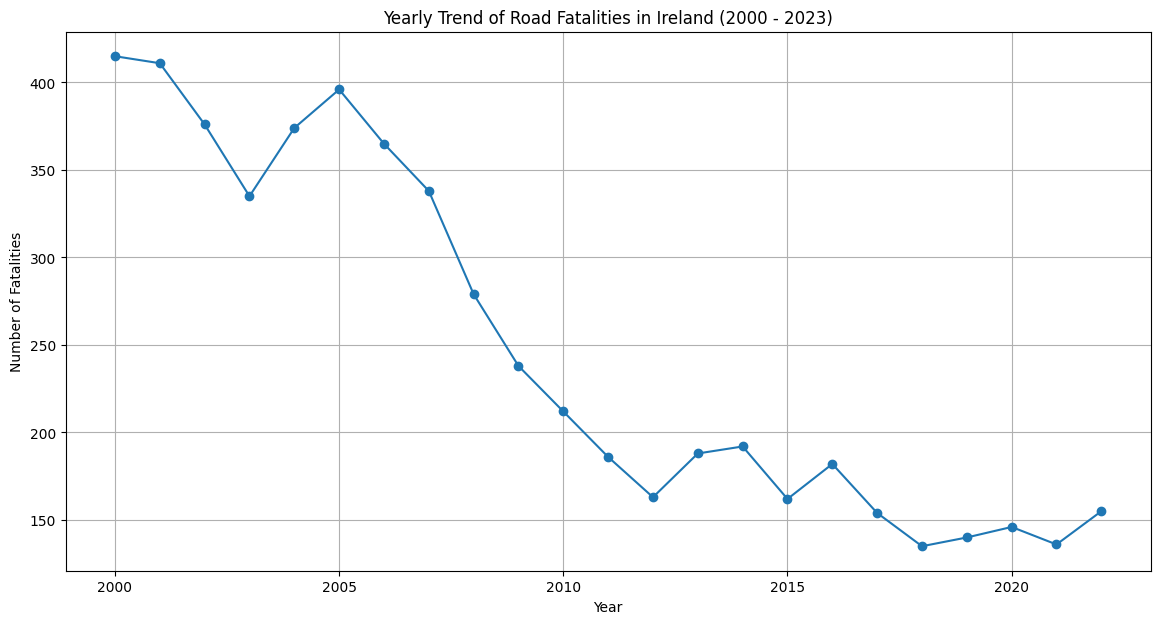

In [42]:
import matplotlib.pyplot as plt

# Including only rows with 'Annual Fatalities'
annual_road_fatalities = road_fatalities_2000_to_2023[road_fatalities_2000_to_2023['Month'] == 'Annual Fatalities']


# Selecting only the 'Year' and 'Road Fatality Count' columns for plotting
annual_road_fatalities = annual_road_fatalities[['Year', 'Road Fatality Count']].set_index('Year')

plt.figure(figsize=(14, 7))

# Giving a marker for each year
annual_road_fatalities['Road Fatality Count'].plot(kind='line', marker='o')

plt.title('Yearly Trend of Road Fatalities in Ireland (2000 - 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

In [44]:

annual_fatalities = road_fatalities_2000_to_2023[road_fatalities_2000_to_2023['Month'] == 'Annual Fatalities']

statistics = annual_fatalities['Road Fatality Count'].describe()

# Formatting for the output
print("Statistical Summary of Yearly Road Fatalities (2000 - 2023):")
print(f"Mean (Average): {statistics['mean']:.2f}")
print(f"Standard Deviation: {statistics['std']:.2f}")
print(f"Minimum: {statistics['min']}")
print(f"25th Percentile: {statistics['25%']}")
print(f"Median (50th Percentile): {statistics['50%']}")
print(f"75th Percentile: {statistics['75%']}")
print(f"Maximum: {statistics['max']}")


Statistical Summary of Yearly Road Fatalities (2000 - 2023):
Mean (Average): 246.87
Standard Deviation: 103.29
Minimum: 135.0
25th Percentile: 158.5
Median (50th Percentile): 192.0
75th Percentile: 351.5
Maximum: 415.0
